# TP4: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:
#pip install graphviz

In [208]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

# Load the library with the iris dataset
from sklearn.datasets import load_iris, load_wine

# Load the gridsearch
from sklearn.model_selection import GridSearchCV

# Load scikit's decision tree classifier
from sklearn import tree

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load scikit's linear regression classifier
from sklearn.linear_model import LinearRegression

# Load scikit's regression metrics
from sklearn.metrics import r2_score, mean_squared_error

# To visualize trees
import graphviz 

# Load pandas to manipulate data frames (Excel like)
import pandas as pd

# Load numpy
import numpy as np

# Load pretty dataframe display
from IPython.display import display, HTML, update_display

# Load seaborn
import seaborn as sns

# Load pandas
import pandas as pd

# Set random seed
np.random.seed(0)

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [3]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.

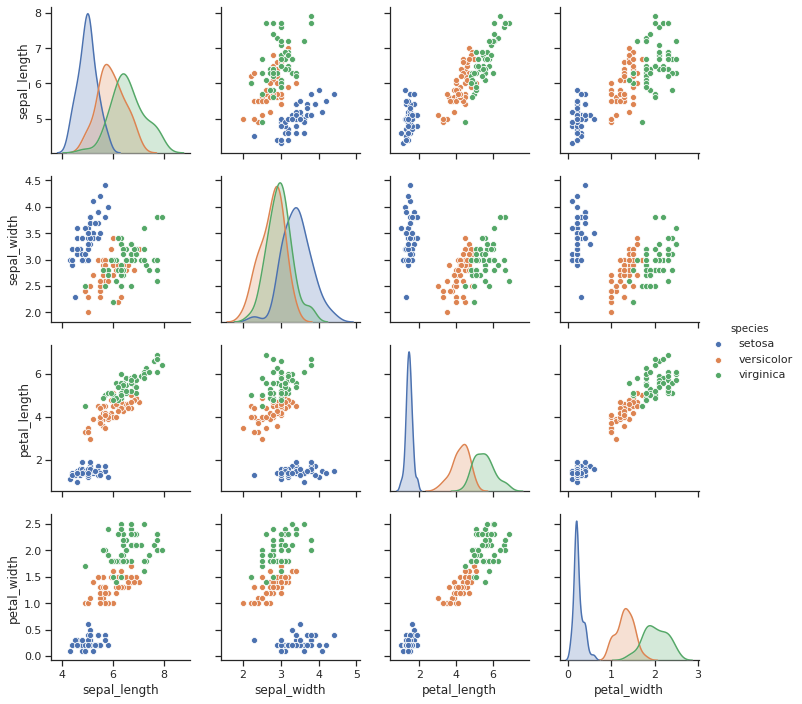

In [4]:
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [5]:
iris.data.shape

(150, 4)

## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [189]:
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [8]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [9]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [10]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [11]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y_train = pd.factorize(train['species'])[0]
y_test = pd.factorize(test['species'])[0]

## Step 3: decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y_train)

# Using the whole dataset you may use directly:
#clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

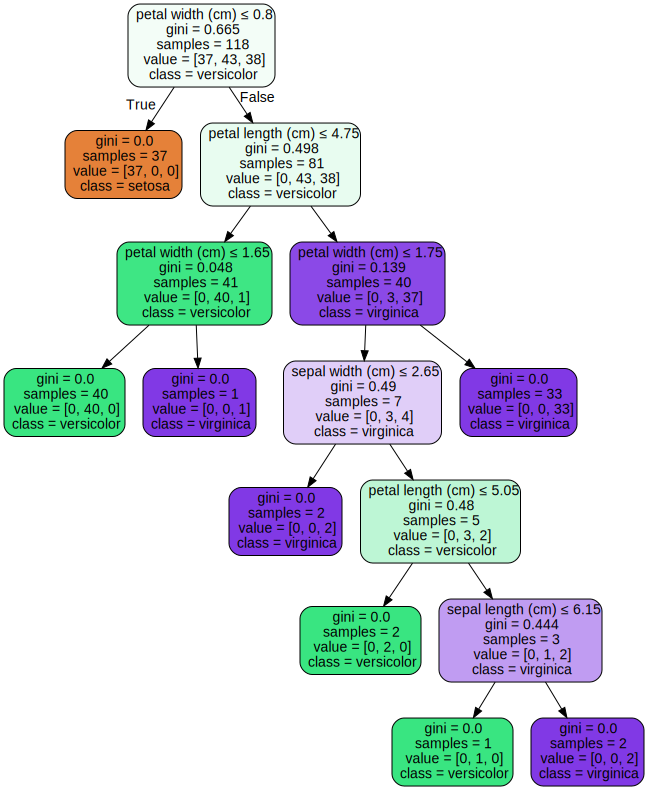

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

After being fitted, **the model can then be used to predict the class of samples**:

In [16]:
class_pred = clf.predict(iris.data[:1, :])
class_pred

array([0])

## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y_train)

XXX comments here XXX

Reutilisation de la fonction de Ensemble Learning :

In [18]:
def frontieres(clf, X):
    h = .1
    n = X.shape[1]
    print(n)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x3_min, x3_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    x4_min, x4_max = X[:, 3].min() - .5, X[:, 3].max() + .5
    
    mean1 = (x1_min + x1_max)/2
    mean2 = (x2_min + x2_max)/2
    mean3 = (x3_min + x3_max)/2
    mean4 = (x4_min + x4_max)/2
    
    x11, x22, x33, x44 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                     np.arange(x2_min, x2_max, h),
                                     np.arange(x3_min, x3_max, h),
                                     np.arange(x4_min, x4_max, h))
    print(x11.shape, x22.shape, x33.shape, x44.shape, np.c_[x11.ravel(), x22.ravel()].shape)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[x11.ravel(), x22.ravel()])
    else:
        Z = clf.predict(np.c_[x11.ravel(), x22.ravel(), x33.ravel(), x44.ravel()])
    Z=Z.reshape(x11.shape)
    
    return Z
    
    #plt.contourf(x11, x22, Z[:, :, mean3, mean4], cmap=plt.cm.bwr, alpha=.8)

In [19]:
X = test[[features[0], features[2]]].to_numpy()
X.shape

i, j = 0, 2
Z = frontieres(clf, test[features].to_numpy())#, test[[features[0], features[2]]].to_numpy())

4
(26, 44, 68, 34) (26, 44, 68, 34) (26, 44, 68, 34) (26, 44, 68, 34) (2644928, 2)


TypeError: Input z must be a 2D array.

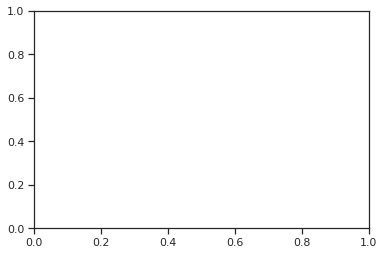

In [20]:
Z = clf.predict(test[features])
plt.contourf(test[features[0]].to_numpy(),
             test[features[2]].to_numpy(),
             Z, cmap=plt.cm.bwr, alpha=.8)

## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results. 

In [17]:
def trainmodel(sentence, test_species=test['species'],
               train=train[features], test=test[features],
               y_train=y_train, y_test=y_test, **kwargs):
    clf = tree.DecisionTreeClassifier(**kwargs)
    clf = clf.fit(train, y_train)
    print(sentence.format(clf.score(test, y_test)))
    preds = clf.predict(test)
    preds_names = pd.Categorical.from_codes(preds, iris.target_names)
    confusiondf = pd.crosstab(test_species, preds, rownames=['Actual Species'], colnames=['Predicted Species'])
    display(HTML(confusiondf.to_html()))

In [18]:
trainmodel('sepal score: {:.2%}', train=train[features[0:2]], test=test[features[0:2]])
trainmodel('petal score: {:.2%}', train=train[features[2:4]], test=test[features[2:4]])

sepal score: 75.00%


Predicted Species,0,1,2
Actual Species,,,
setosa,11,2,0
versicolor,0,5,2
virginica,0,4,8


petal score: 96.88%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


In [19]:
trainmodel('total score: {:.2%}')

total score: 96.88%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


In [20]:
trainmodel('with entropy: {:.2%}', criterion='entropy')
trainmodel('with gini:    {:.2%}', criterion='gini')

with entropy: 93.75%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


with gini:    96.88%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,6,1
virginica,0,0,12


In [21]:
trainmodel('with best splitter: {:.2%}', splitter='best')
trainmodel('with rand splitter: {:.2%}', splitter='random')

with best splitter: 93.75%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


with rand splitter: 90.62%


Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,1,11


### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [22]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=10)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [23]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 32
Categories (3, object): [setosa, versicolor, virginica]

### Create a confusion matrix

In [24]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [25]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

1.

Kinda same

2.

Extract 5 trees:

In [26]:
trees = rf.estimators_[:5]

Visualise them one after the other:

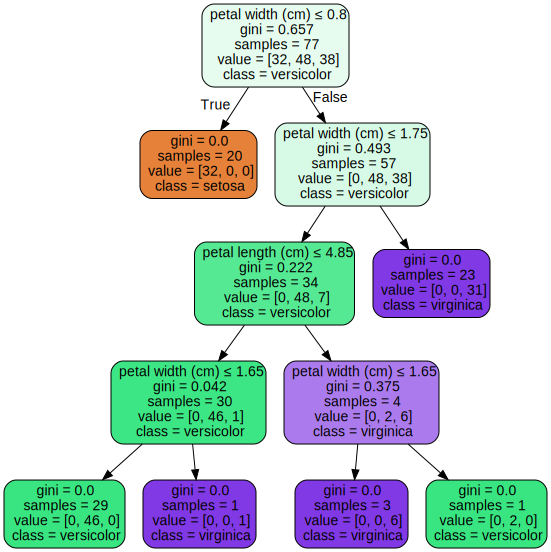

In [27]:
graphs = []
N = 5
steps=3
for i in range(N):
    dot_data = tree.export_graphviz(trees[i], out_file=None, 
                             feature_names=iris.feature_names,  
                             class_names=iris.target_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graphs.append(graphviz.Source(dot_data))
display(graphs[0], display_id='1')
for i in range(steps*N):
    time.sleep(1)
    update_display(graphs[i%N], display_id='1')

In [28]:
rf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=10, max_depth=2)
rf.fit(train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
def trainRF(sentence, N=20, test_species=test['species'],
            train=train[features], test=test[features],
            y_train=y_train, y_test=y_test, **kwargs):
    start = time.time()
    avg_score = 0
    for n in range(N):
        clf = RandomForestClassifier(**kwargs)
        clf = clf.fit(train, y_train)
        avg_score += 1/N * clf.score(test, y_test)
    end = time.time()
    print(sentence.format(avg_score))
#     preds = clf.predict(test)
#     preds_names = pd.Categorical.from_codes(preds, iris.target_names)
#     confusiondf = pd.crosstab(test_species, preds, rownames=['Actual Species'], colnames=['Predicted Species'])
#     print('confusion matrix:')
#     display(HTML(confusiondf.to_html()))
    dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
    print('one tree:')
    display(graphviz.Source(dot_data))
    print('average time: {:.0f} ms'.format((end-start)/N*1e3))

default parameters: 94.75%
one tree:


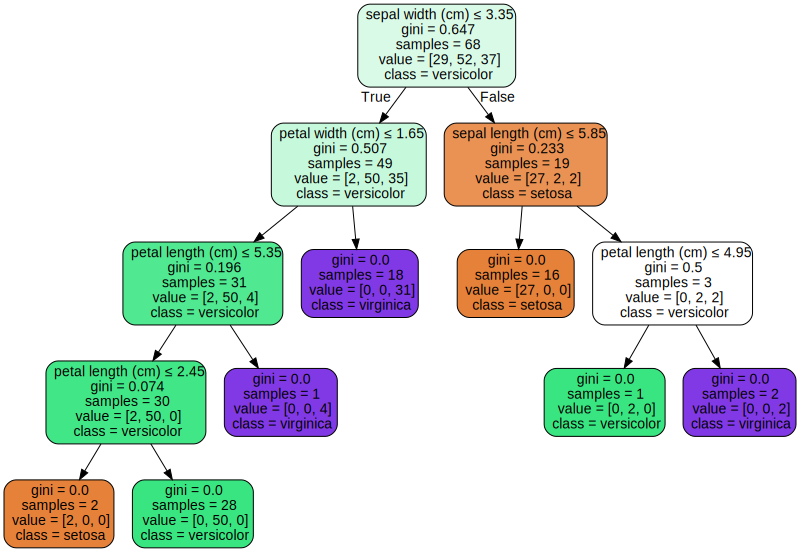

average time: 51 ms


In [134]:
trainRF('default parameters: {:.2%}', N=50, n_estimators=10)

max_depth=2: 93.06%
one tree:


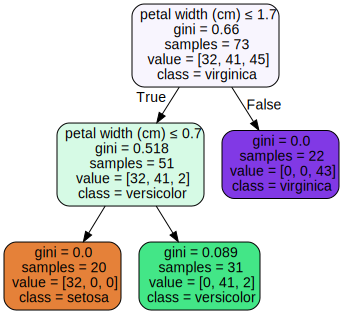

average time: 49 ms


In [135]:
trainRF('max_depth=2: {:.2%}', N=50, n_estimators=10,
        max_depth=2)

min_samples_split=20: 94.13%
one tree:


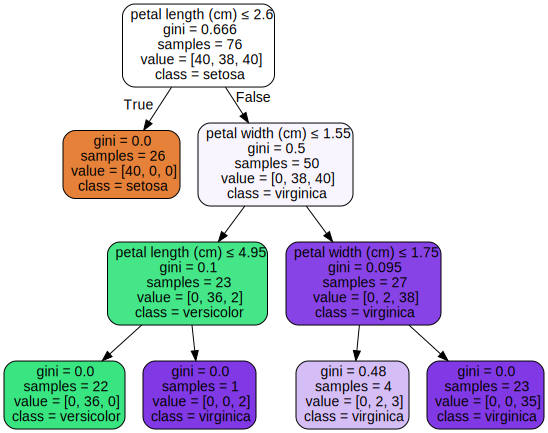

average time: 47 ms


In [142]:
trainRF('min_samples_split=20: {:.2%}', N=50, n_estimators=10,
        min_samples_split=20)

min_samples_split=20%: 92.62%
one tree:


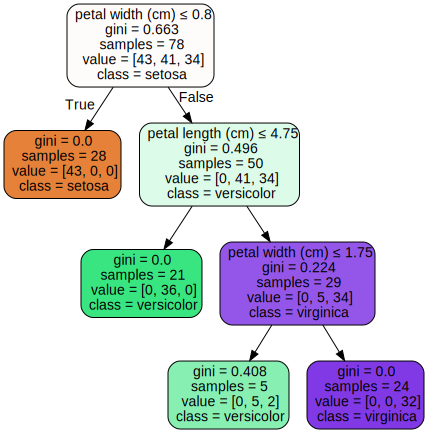

average time: 48 ms


In [143]:
trainRF('min_samples_split=20%: {:.2%}', N=50, n_estimators=10,
        min_samples_split=0.2)

min_samples_leaf=5: 92.56%
one tree:


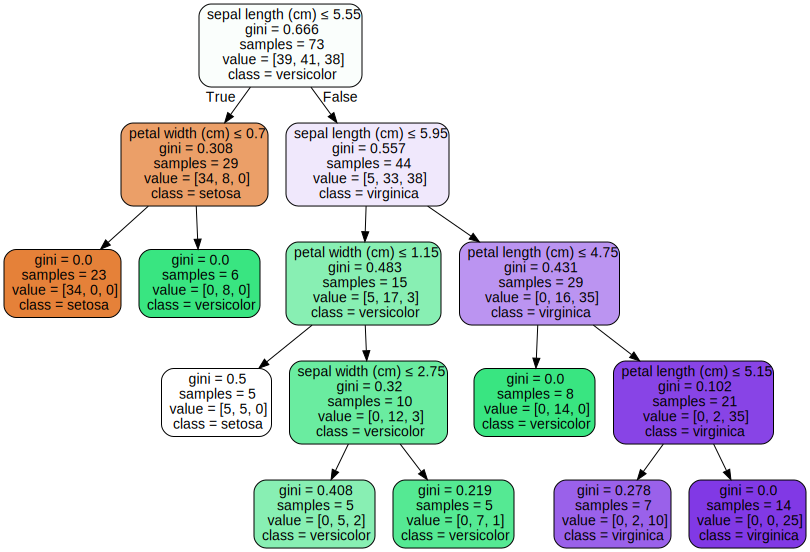

average time: 53 ms


In [144]:
trainRF('min_samples_leaf=5: {:.2%}', N=50, n_estimators=10,
        min_samples_leaf=5)

min_samples_leaf=10%: 92.94%
one tree:


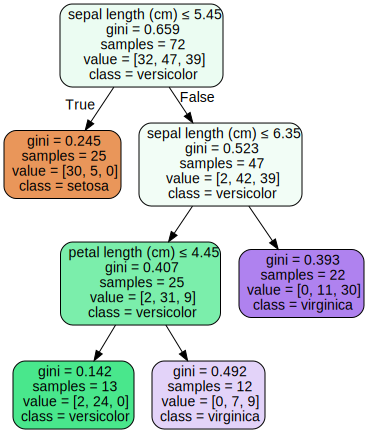

average time: 51 ms


In [145]:
trainRF('min_samples_leaf=10%: {:.2%}', N=50, n_estimators=10,
        min_samples_leaf=0.1)

n_estimators=100: 93.94%
one tree:


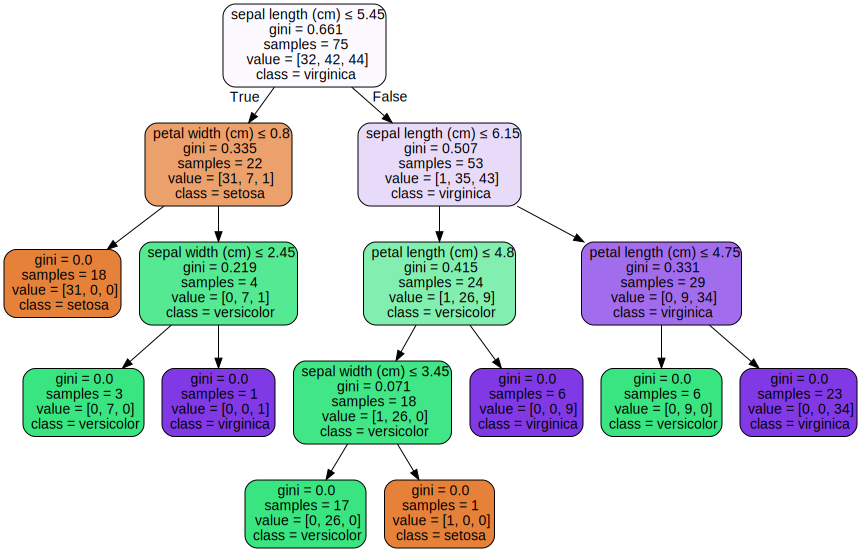

average time: 429 ms


In [146]:
trainRF('n_estimators=100: {:.2%}', N=50, n_estimators=100)

max_leaf_nodes=4: 93.44%
one tree:


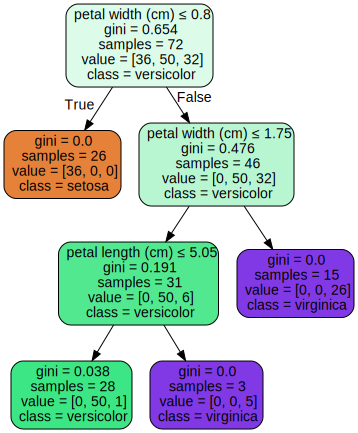

average time: 51 ms


In [156]:
trainRF('max_leaf_nodes=4: {:.2%}', N=50, n_estimators=10,
        max_leaf_nodes=4)

In [186]:
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 2, 3, 5],
              'min_samples_split': [2, 4, 8, 16],
              'min_samples_leaf': [1, 2, 4, 8]}

rf = RandomForestClassifier()
clf2 = GridSearchCV(rf, parameters, cv=3)
clf2.fit(train[features], y_train)

/home/tfm/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [169]:
clf.best_estimator_.score(test[features], y_test)

0.96875

In [185]:
{k: v for k, v in clf.best_estimator_.get_params().items() if k in parameters.keys()}

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

4.

Bootstrap ==> for each decision tree, some rows will be used and some others won't be ==> Unused data points regarding to some decision trees ==> evaluate all the DT that haven't seen this data point (oob), majority vote, and compare to ground truth ==>  OOB score

5.

class_weight = "balanced" ==> $w_j=\frac{n}{k*n_j}$

## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

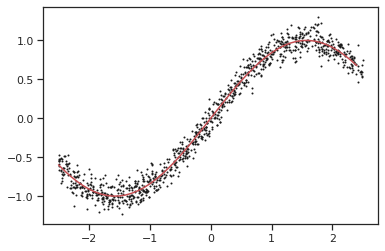

In [221]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

x_test = np.random.uniform(-2.5, 2.5, 997) #997 is prime so the elements will be differents from the train set
y_test = np.sin(x_test) + np.random.normal(0, .1, 997)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

In [224]:
x = x.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [248]:
def compare_model(name, model, x=x, y=y,
                  x_test=x_test, y_test=y_test):
    model.fit(x, y)
    pred = model.predict(x_test)
    print(name)
    print('r2 score: {:.3f}'.format(r2_score(pred, y_test)))
    print('mean squared error: {:.3f}\n'.format(mean_squared_error(pred, y_test)))

In [249]:
compare_model('Random Forest', RandomForestRegressor(n_estimators=30, max_depth=4))
compare_model('Linear Regression', LinearRegression())

Random Forest
r2 score: 0.978
mean squared error: 0.013

Linear Regression
r2 score: 0.842
mean squared error: 0.088



## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [ ]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
                